In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()

In [15]:
def bench(n=2**20, q=2**20, source='std'):
    !make -s {source}
    if _exit_code != 0:
        raise Exception("Compilation failed")
    res = !./{source} {n} {q}
    #res = !g++ -O3 -march=native -D N={n} -D Q={q} {source} -o run && ./run
    duration = float(res[0].split()[0])
    check = int(res[1])
    print(f'{source:>18} {n:<7} {q:<7} {check:10} {duration}')
    return duration

ns = list(int(1.17**k) for k in range(30, 60))

In [16]:
def plot(title=None, ylabel=None, path=None, ch=None, legend=False, ylim=None):
    if ch:
        lines = [
            (2**13, "32K"),
            (2**17, "512K"),
            (2**20, "4M"),
        ]

        for x, t in lines:
            #plt.text(x * 1.2, ch, t)
            plt.axvline(x=x, color='black', linestyle='--')

    plt.xscale('log', base=2)
    plt.xlabel('Array size')

    if ylabel:
        plt.ylabel(ylabel)

    if title:
        plt.title(title, pad=12)

    if legend:
        plt.legend(loc='best')

    plt.ylim(bottom=0, top=ylim)
    plt.margins(0)

    if path:
        fig = plt.gcf()
        fig.savefig(path)
    plt.show()


#plt.plot(ns, inc_res, color='darkred')
#plot('for (int i = 0; i < n; i++) a[i]++', 'Increments per second ($10^9$)', 'inc.svg', 4.7)

In [17]:
bench(source='textbook', n=2**24)
bench(source='branchless', n=2**24)
bench(source='branchless-prefetch', n=2**24)
bench(source='branchless-drop-in', n=2**24)

          textbook 16777216 1048576 1448891158 506.17
        branchless 16777216 1048576 1448891158 506.4
branchless-prefetch 16777216 1048576 1448891158 421.88
branchless-drop-in 16777216 1048576 1448891158 570.95


570.95

In [18]:
bench(source='branchless-drop-in', n=2**12)

branchless-drop-in 4096    1048576 1600616319 59.61


59.61

In [19]:
[bench(source=source, n=2**12) for source in ['textbook', 'branchless', 'branchless-drop-in']]

          textbook 4096    1048576 1600616319 60.27
        branchless 4096    1048576 1600616319 13.85
branchless-drop-in 4096    1048576 1600616319 60.79


[60.27, 13.85, 60.79]

In [20]:
x = [bench(source='eytzinger', n=n, q=2**22) for n in ns]

         eytzinger 111     4194304 1067433874 8.63
         eytzinger 129     4194304 2084202863 8.71
         eytzinger 152     4194304 1650086489 13.67
         eytzinger 177     4194304 1093987052 14.52
         eytzinger 208     4194304  849577987 11.45
         eytzinger 243     4194304 1842022031 9.75
         eytzinger 284     4194304   24170984 12.63
         eytzinger 333     4194304 1064724685 17.1
         eytzinger 389     4194304 1049421536 17.62
         eytzinger 456     4194304 1677787291 12.56
         eytzinger 533     4194304 1381557454 13.19
         eytzinger 624     4194304  485950239 17.95
         eytzinger 730     4194304 1743435292 18.09
         eytzinger 855     4194304 1980389118 15.91
         eytzinger 1000    4194304  929098415 13.7
         eytzinger 1170    4194304 1814983758 17.46
         eytzinger 1369    4194304  683804919 21.55
         eytzinger 1602    4194304  231941320 19.11
         eytzinger 1874    4194304  926717548 16.31
         eytzinge

In [21]:
y = [bench(source='eytzinger-last', n=n, q=2**22) for n in ns]

    eytzinger-last 111     4194304 1067433874 14.98
    eytzinger-last 129     4194304 2084202863 9.33
    eytzinger-last 152     4194304 1650086489 9.66
    eytzinger-last 177     4194304 1093987052 9.88
    eytzinger-last 208     4194304  849577987 9.15
    eytzinger-last 243     4194304 1842022031 9.71
    eytzinger-last 284     4194304   24170984 10.42
    eytzinger-last 333     4194304 1064724685 11.45
    eytzinger-last 389     4194304 1049421536 10.44
    eytzinger-last 456     4194304 1677787291 18.12
    eytzinger-last 533     4194304 1381557454 11.89
    eytzinger-last 624     4194304  485950239 11.88
    eytzinger-last 730     4194304 1743435292 14.62
    eytzinger-last 855     4194304 1980389118 12.94
    eytzinger-last 1000    4194304  929098415 12.91
    eytzinger-last 1170    4194304 1814983758 14.19
    eytzinger-last 1369    4194304  683804919 14.14
    eytzinger-last 1602    4194304  231941320 14.42
    eytzinger-last 1874    4194304  926717548 17.46
    eytzinger-las

In [22]:
z = [bench(source='eytzinger-fill', n=n, q=2**22) for n in ns]

    eytzinger-fill 111     4194304 1067433874 9.47
    eytzinger-fill 129     4194304 2084202863 9.5
    eytzinger-fill 152     4194304 1650086489 10.31
    eytzinger-fill 177     4194304 1093987052 9.97
    eytzinger-fill 208     4194304  849577987 9.31
    eytzinger-fill 243     4194304 1842022031 9.52
    eytzinger-fill 284     4194304   24170984 11.28
    eytzinger-fill 333     4194304 1064724685 11.22
    eytzinger-fill 389     4194304 1049421536 11.13
    eytzinger-fill 456     4194304 1677787291 10.96
    eytzinger-fill 533     4194304 1381557454 12.25
    eytzinger-fill 624     4194304  485950239 12.78
    eytzinger-fill 730     4194304 1743435292 13.27
    eytzinger-fill 855     4194304 1980389118 12.5
    eytzinger-fill 1000    4194304  929098415 12.55
    eytzinger-fill 1170    4194304 1814983758 14.46
    eytzinger-fill 1369    4194304  683804919 14.36
    eytzinger-fill 1602    4194304  231941320 14.17
    eytzinger-fill 1874    4194304  926717548 13.82
    eytzinger-fill 

In [23]:
mini_std = [bench(source='std', n=n, q=2**22) for n in ns]
mini_branchless = [bench(source='branchless', n=n, q=2**22) for n in ns]

               std 111     4194304 1067433874 22.82
               std 129     4194304 2084202863 24.82
               std 152     4194304 1650086489 25.73
               std 177     4194304 1093987052 26.53
               std 208     4194304  849577987 31.27
               std 243     4194304 1842022031 30.58
               std 284     4194304   24170984 32.05
               std 333     4194304 1064724685 32.15
               std 389     4194304 1049421536 38.01
               std 456     4194304 1677787291 36.88
               std 533     4194304 1381557454 36.74
               std 624     4194304  485950239 37.16
               std 730     4194304 1743435292 38.32
               std 855     4194304 1980389118 38.85
               std 1000    4194304  929098415 41.67
               std 1170    4194304 1814983758 41.52
               std 1369    4194304  683804919 42.87
               std 1602    4194304  231941320 44.59
               std 1874    4194304  926717548 46.42
            

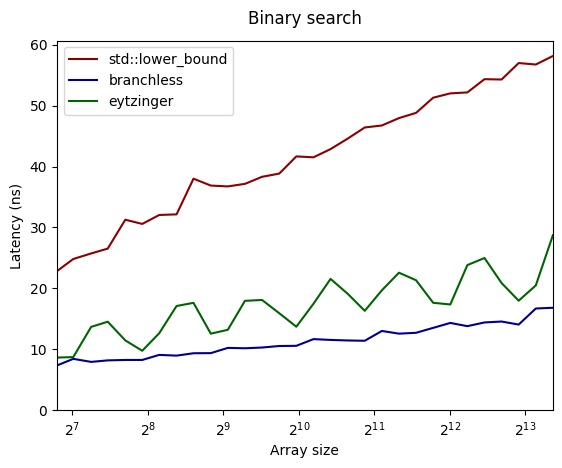

In [24]:
plt.plot(ns, mini_std, color='darkred', label='std::lower_bound')
plt.plot(ns, mini_branchless, color='darkblue', label='branchless')
plt.plot(ns, x, color='darkgreen', label='eytzinger')

plot('Binary search', 'Latency (ns)', path='bumps.svg', legend=True)

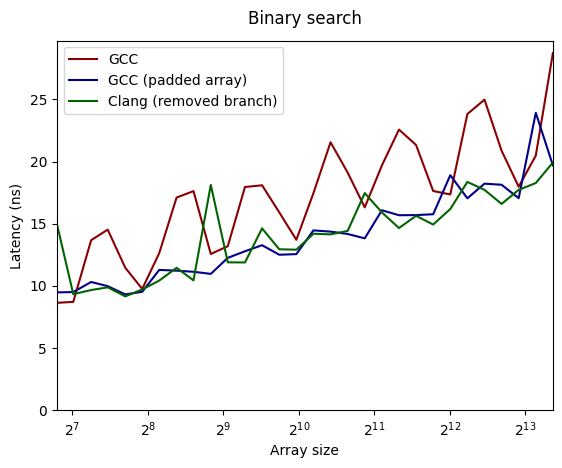

In [25]:
plt.plot(ns, x, color='darkred', label='GCC')
plt.plot(ns, z, color='darkblue', label='GCC (padded array)')
plt.plot(ns, y, color='darkgreen', label='Clang (removed branch)')

plot('Binary search', 'Latency (ns)', path='branchless-eytzinger.svg', legend=True)

In [26]:
# bench(source='btree', n=2**23, q=2**22)
# bench(source='btree-hugepages', n=2**23, q=2**22)

In [27]:
#bench(n=2**10, q=2**22, source='std')
#bench(n=2**10, q=2**22, source='textbook')
bench(n=2**10, q=2**22, source='branchless')
# bench(n=2**10, q=2**22, source='btree-hugepages')
# bench(n=2**10, q=2**22, source='btree-unrolled')

        branchless 1024    4194304 1732687167 11.52


11.52

In [28]:
def plot(title=None, ylabel=None, path=None, ch=None, legend=False, ylim=None):
    if ch:
        lines = [
            (2**13, "32K"),
            (2**17, "512K"),
            (2**20, "4M"),
        ]

        for x, t in lines:
            #plt.text(x * 1.2, ch, t)
            plt.axvline(x=x, color='black', linestyle='--')

    plt.xscale('log', base=2)
    plt.xlabel('Array size')

    if ylabel:
        plt.ylabel(ylabel)

    if title:
        plt.title(title, pad=12)

    if legend:
        plt.legend(loc='best')

    plt.ylim(bottom=0, top=ylim)
    plt.margins(0)

    if path:
        fig = plt.gcf()
        fig.savefig(path)
    plt.show()


#plt.plot(ns, inc_res, color='darkred')
#plot('for (int i = 0; i < n; i++) a[i]++', 'Increments per second ($10^9$)', 'inc.svg', 4.7)

In [29]:
tasks = [
    # source, name, color
    ('std', 'std::lower_bound', 'darkred'),
    ('branchless', 'branchless', 'darkblue'),
    ('eytzinger', 'eytzinger', 'darkgreen'),
    ('eytzinger-prefetch', 'eytzinger (with prefetching)', 'orange'),
    ('eytzinger-fill','eytzinger (fixed number of iterations)', 'purple')
    # ('btree', 'B-tree (with SIMD)', 'purple'),
    # ('btree-hugepages', 'B-tree (with SIMD and huge pages)', 'cyan'),
]

#ns = [2**14, 2**15]
ns = list(int(1.17**k) for k in range(30, 105))

results = [
    [bench(n=n, q=2**22, source=source) for n in ns]
    for source, _, _ in tasks
]

               std 111     4194304 1067433874 23.37
               std 129     4194304 2084202863 25.03
               std 152     4194304 1650086489 26.01
               std 177     4194304 1093987052 26.42
               std 208     4194304  849577987 27.83
               std 243     4194304 1842022031 30.18
               std 284     4194304   24170984 30.87
               std 333     4194304 1064724685 31.5
               std 389     4194304 1049421536 32.77
               std 456     4194304 1677787291 35.19
               std 533     4194304 1381557454 36.62
               std 624     4194304  485950239 36.37
               std 730     4194304 1743435292 37.35
               std 855     4194304 1980389118 38.95
               std 1000    4194304  929098415 42.19
               std 1170    4194304 1814983758 41.65
               std 1369    4194304  683804919 43.26
               std 1602    4194304  231941320 45.43
               std 1874    4194304  926717548 47.65
             

In [30]:
import pickle

with open('results.pkl', 'wb') as file:
    pickle.dump(results, file)

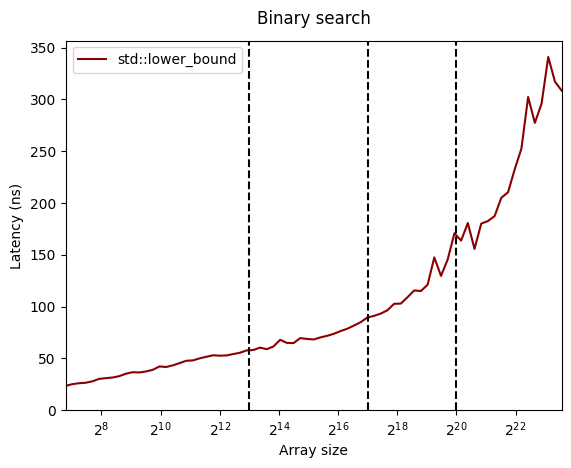

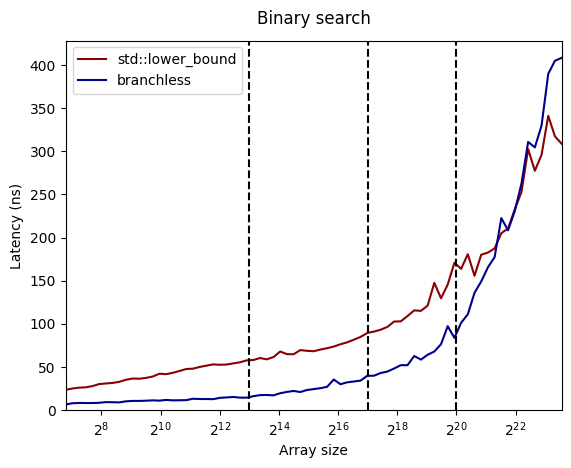

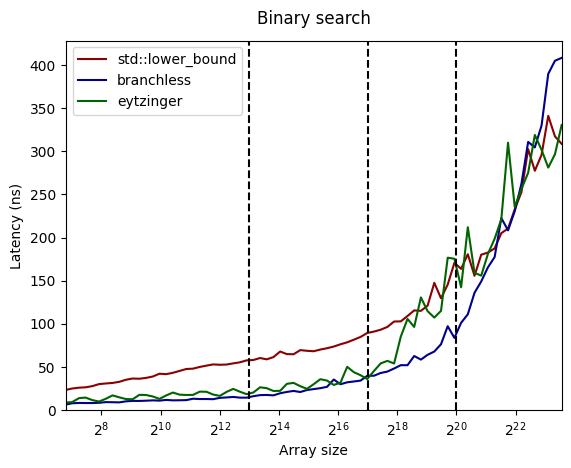

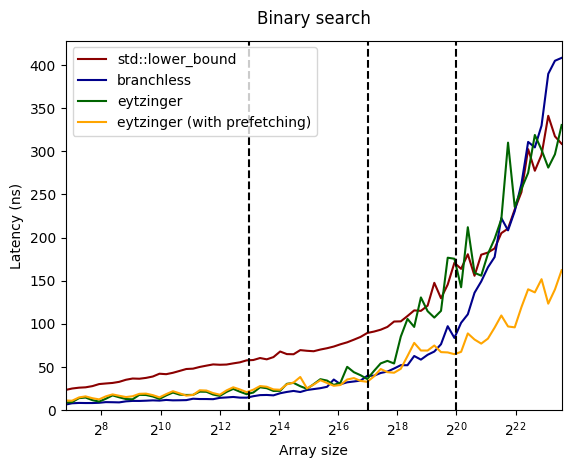

In [31]:
for i, current in enumerate(tasks):
    for (source, name, color), latencies in list(zip(tasks, results))[:i + 1]:
        plt.plot(ns, latencies, color=color, label=name)
    
    plot('Binary search', 'Latency (ns)', current[0] + '.svg', 1, legend=True)